In [2]:
import numpy as np
import scipy.linalg as la
import asymmetric as asym
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# 7-Site

In [3]:
L = 7
# Total time elapsed
end = 3
# Time steps per second
n = 20

weightfore7, weightback7 = asym.get_plot_weights(L, end, n, here=False)

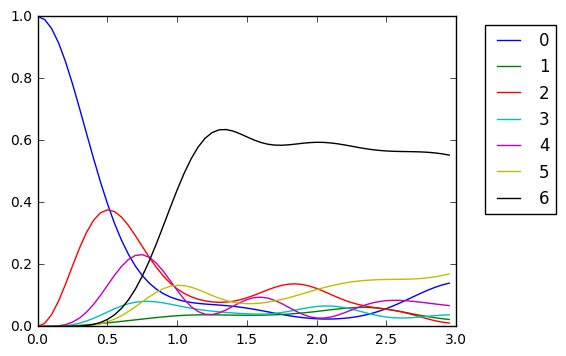

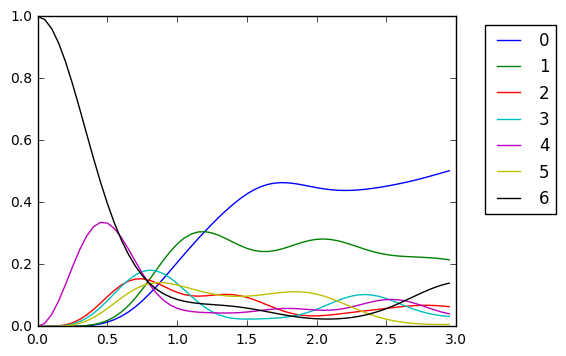

In [4]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore7[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback7[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

# 9-Site
### Pauli Weight

In [5]:
L = 9
# Total time elapsed
end = 3
# Time steps per second
n = 20

weightfore9, weightback9 = asym.get_plot_weights(L, end, n, here=False, dense = True)

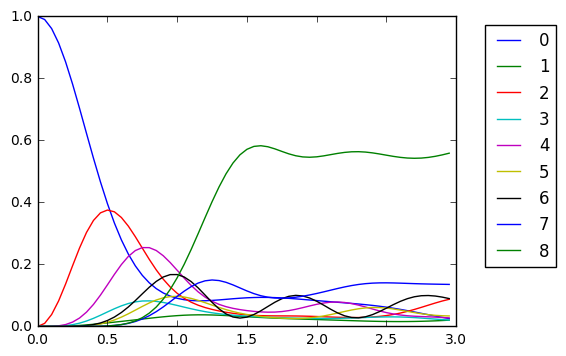

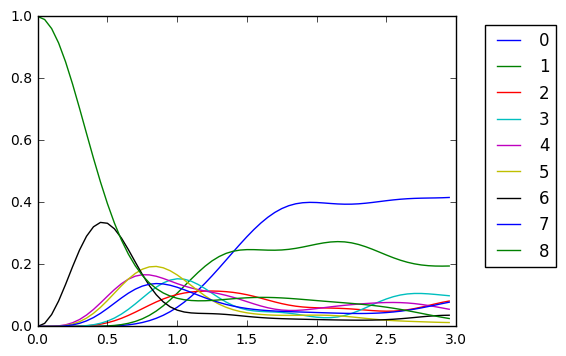

In [6]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

### OTOC,  $A_0+A_1$

In [10]:
L = 9
# Total time elapsed
end = 3
# Time steps per second
n = 20

weightfore9, weightback9 = asym.get_all_weights(L, end, n, here=True, pauli=False, dense=True,
                    dot_strength=None, field_strength=None,
                    Azero=False, Aplus=True, Amult=False)

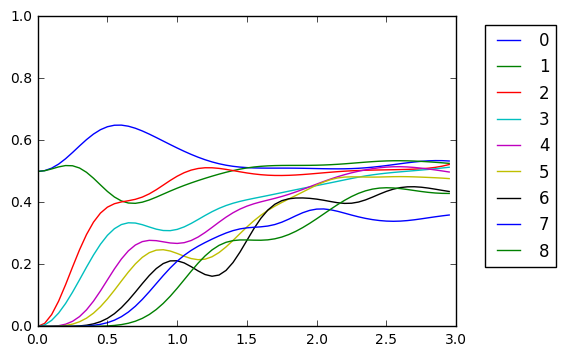

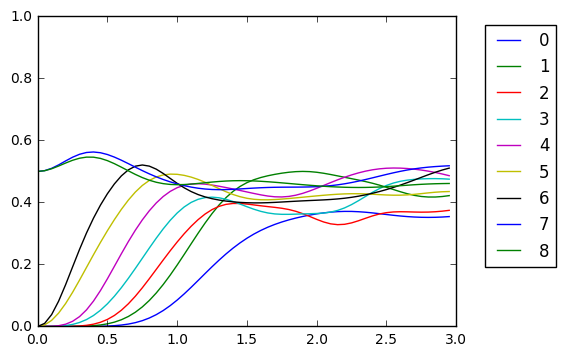

In [11]:
end = (int) (n*3)

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

### Try averaging, find cleanest lines

In [2]:
L = 7; end = 3; n = 20

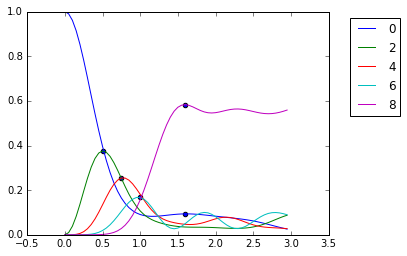

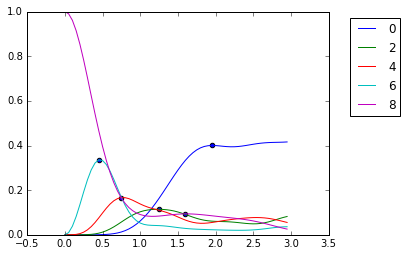

In [31]:
end = (int) (n*3)
peaks = np.zeros((2,L))

ax = plt.subplot(111)
for i in range(L):
    peaks[0,i] = argrelextrema(weightfore9[i], np.greater)[0][0]
    if (i%2==0): 
        ax.plot(np.arange(end)/n,weightfore9[i,:end], label = str(i))
        ax.scatter(peaks[0,i]/n, weightfore9[i, (int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

ax = plt.subplot(111)
for i in range(L):
    peaks[1,i] = argrelextrema(weightback9[i], np.greater)[0][0]
    if (i%2==0): 
        ax.plot(np.arange(end)/n,weightback9[i,:end], label = str(i))
        ax.scatter(peaks[1,i]/n, weightback9[i, (int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.show()

In [33]:
peaks/n

array([[ 1.6 ,  1.15,  0.5 ,  0.8 ,  0.75,  1.  ,  1.  ,  1.25,  1.6 ],
       [ 1.95,  1.5 ,  1.25,  1.  ,  0.75,  0.85,  0.45,  0.85,  1.6 ]])

In [9]:
weightback9[8]

array([  3.77482269e-32,   3.77486853e-32,   3.77507142e-32,
         2.77359931e-32,   2.77429255e-32,   1.23630879e-32,
         6.93346351e-33,   3.10300245e-33,   7.78690926e-34,
         1.53931278e-36,   3.08809676e-33,   9.43706115e-33,
         1.56103834e-32,   3.25491772e-32,   3.77483991e-32,
         4.62728459e-32,   4.62801006e-32,   4.33377620e-32,
         6.24153396e-32,   6.95263065e-32,   8.49336272e-32,
         7.70443862e-32,   8.09398653e-32,   8.90270628e-32,
         8.90270137e-32,   8.90316379e-32,   1.10934082e-31,
         1.01899132e-31,   8.90423137e-32,   1.01883673e-31,
         1.06360541e-31,   1.10934164e-31,   1.06359862e-31,
         1.10933576e-31,   1.20370643e-31,   1.25234374e-31,
         1.20371306e-31,   1.20377483e-31,   1.27701283e-31,
         1.15606025e-31,   1.10933581e-31,   1.20371616e-31,
         1.13262861e-31,   1.10933637e-31,   1.08636673e-31,
         1.01881753e-31,   9.96795828e-32,   9.53470035e-32,
         8.49341011e-32,